Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Adaobi Amanna"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [1]:
#import the necessary libraries
import timeit
import random

#initialize parameters
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    """
    Input: Takes in 3 inputs - integer
    
    returns the median of the 3 inputs
    """
    
#checks each elements in both ascending and descending order to find the median
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1
    

def qsort(lst):
    
    """
    Input: Takes in a list
    
    """
    #assign the range of list to indices
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.12658699999974488


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The Randomized-quicksort in the text book uses recursion to sort, while this one does not use recursion. It gets a random combination of the list partitions it and uses a median of 3 to sort.


## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

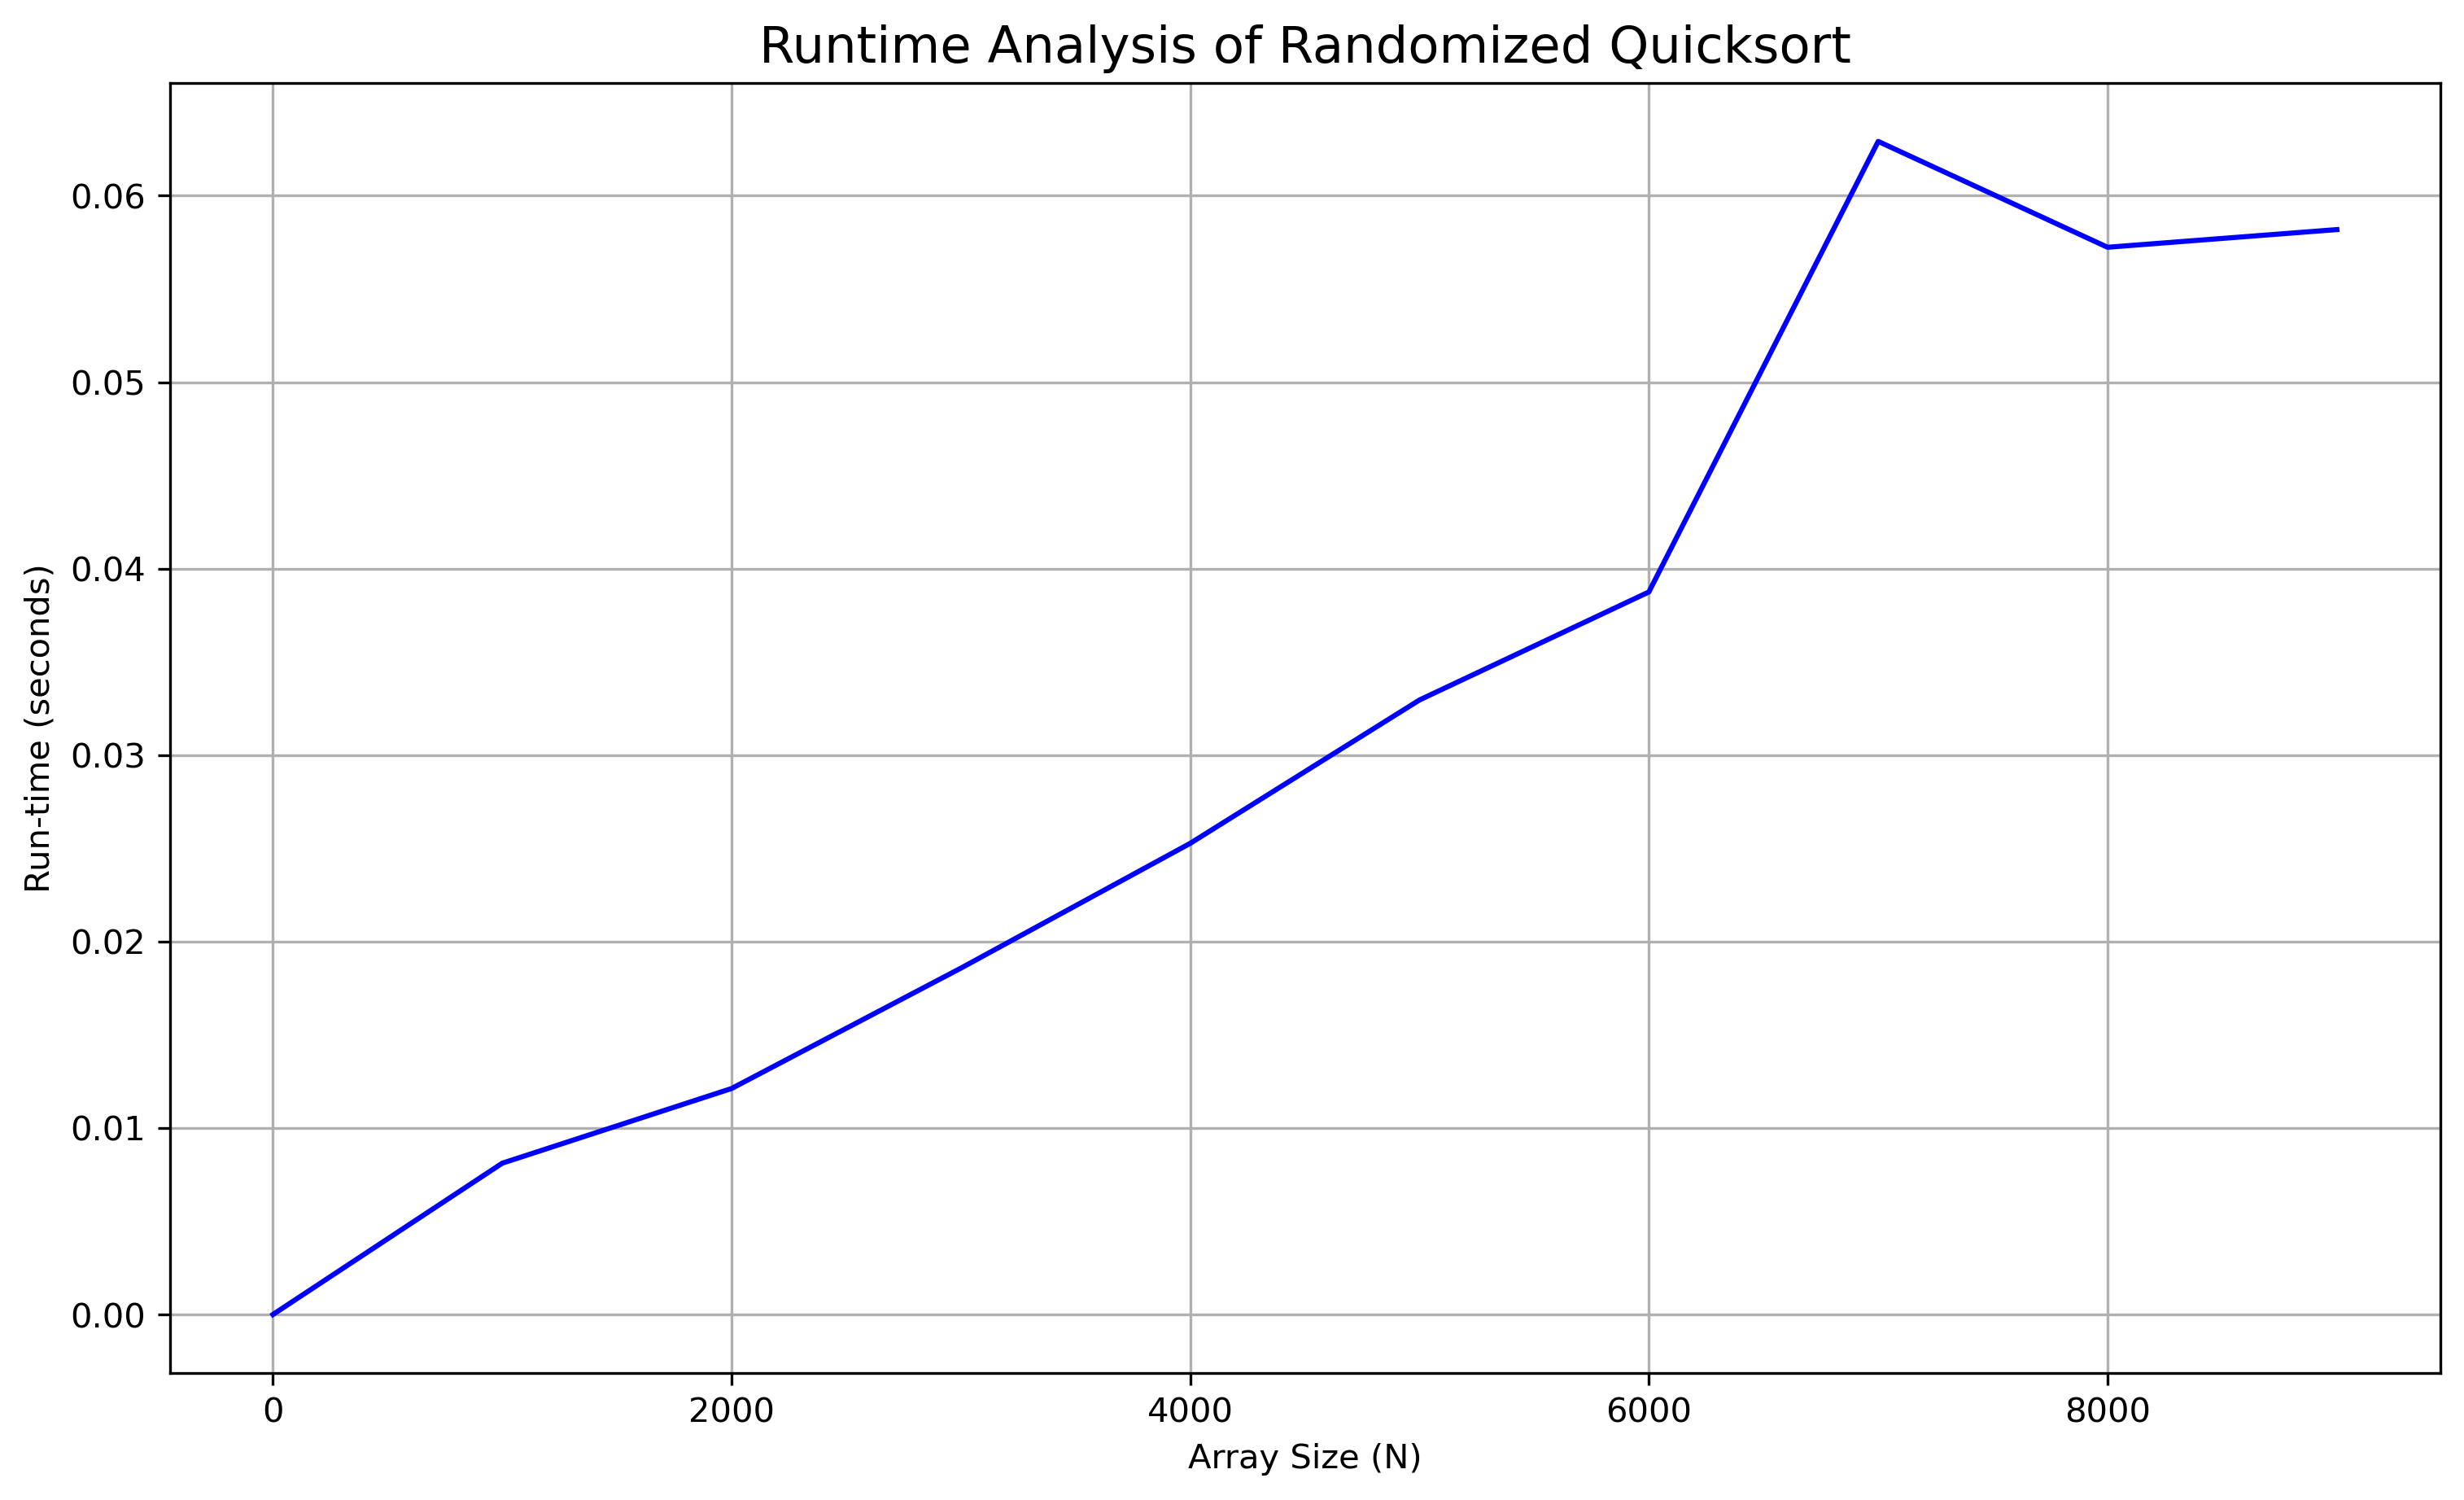

In [24]:
# YOUR CODE HERE
#import the necessary library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Initialize the holder for the number of iterations and the counter
itera = []
counter = []

#iterate through a specific range 
for i in range(10):
    
    # sample array size
    N = 1000*i
    counter.append(N)
    
    iterations = 0
    
    for i in range(10):
    
        # find the time of run for each iteration
        iterations = iterations + timeit.timeit(randomized_quicksort,
                            number=1)
    
    #Append to the list holding the number of iterations 
    itera.append(iterations/10)

plt.figure(figsize=(12,7), dpi=300)
plt.title("Runtime Analysis of Randomized Quicksort", fontsize=15)
plt.plot(counter, itera, label="randomized quicsort", color="b")
plt.xlabel("Array Size (N)")
plt.ylabel("Run-time (seconds)")
plt.grid()
plt.show()

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. In other word, you may want to put the partition in either ```lower``` or ```upper``` list instead of using ``counts`` and ```lst[ind1:ind2] = [partition] * counts``` as we did in question 1.

In [20]:
def qsort(lst):
    indices = [(0, len(lst))]
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into diff arrays
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back to right positions:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper
        
        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [21]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([4,4,2,2,1,1])==[1,1,2,2,4,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

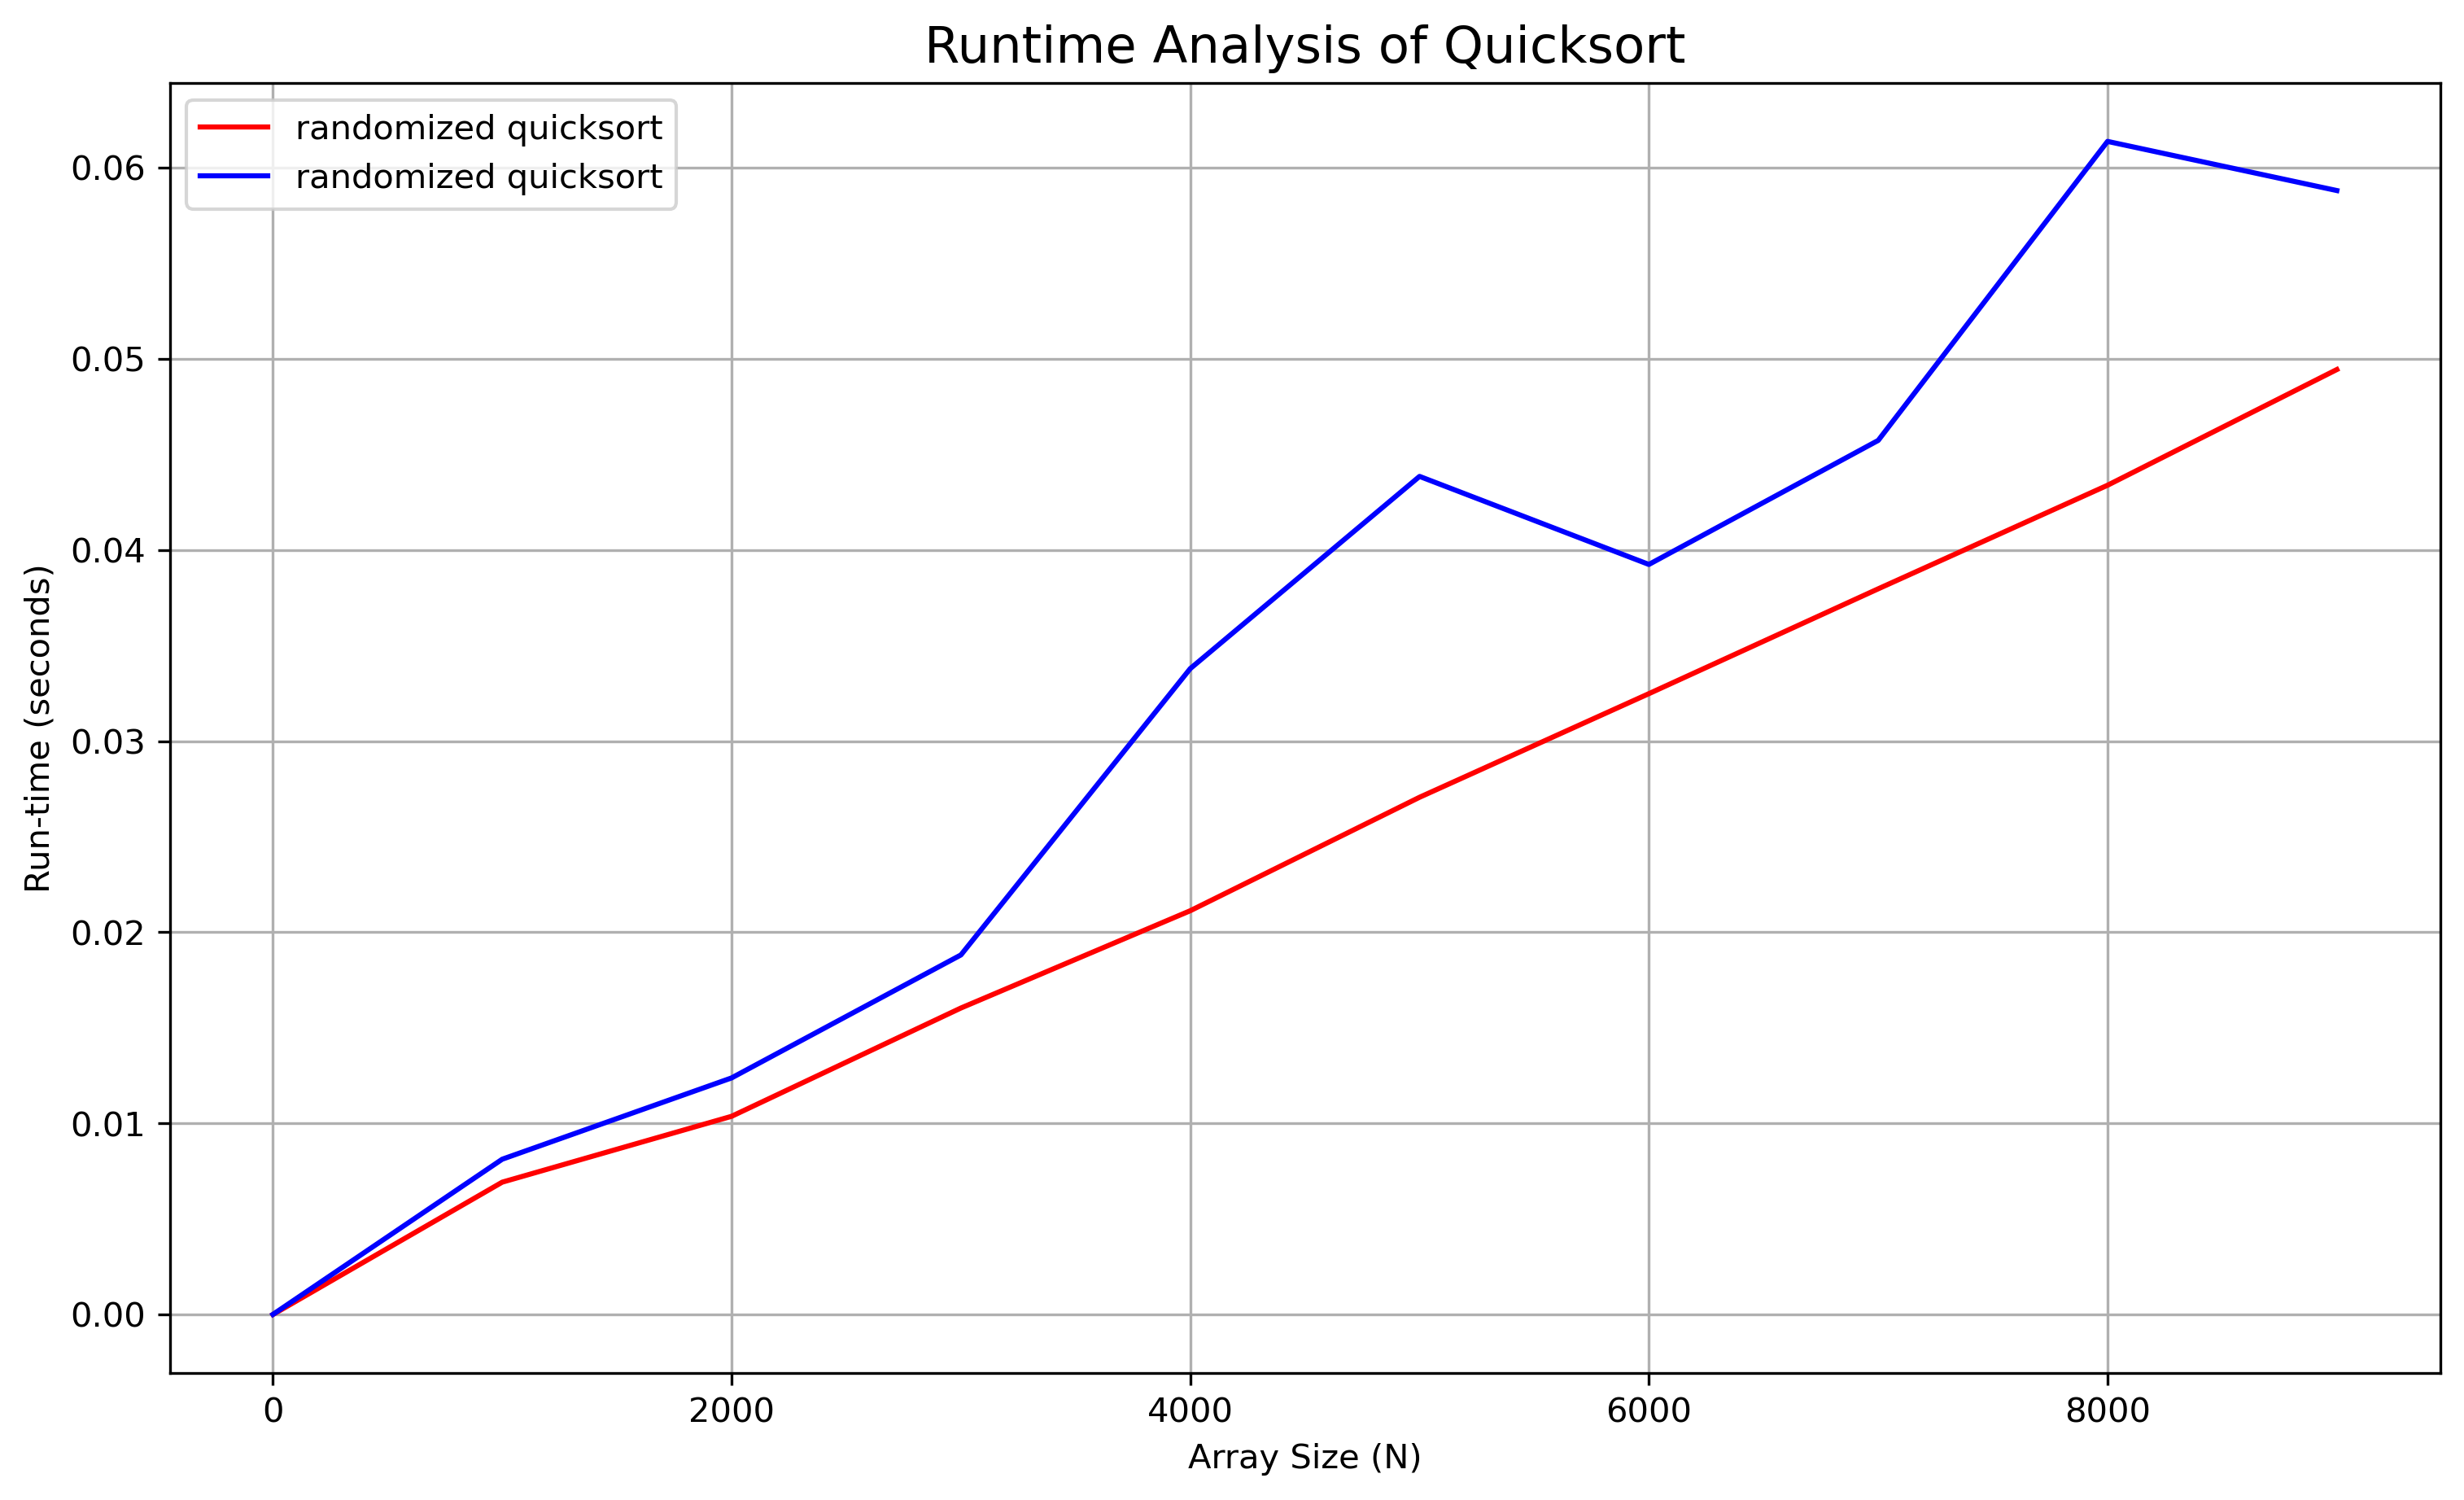

In [23]:
# YOUR CODE HERE
#import the necessary library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Initialize the holder for the number of iterations and the counter
itera_1 = []
counter_1 = []

#iterate through a specific range 
for i in range(10):
    
    # sample array size
    N = 1000*i
    counter_1.append(N)
    mylist = [i for i in range(N)]
    iterations_1 = 0
    
    for i in range(10):
    
        # find the time of run for each iteration
        iterations_1 = iterations_1 + timeit.timeit('qsort(mylist)','from __main__ import qsort, mylist',number=1)
    
    #Append to the list holding the number of iterations 
    itera_1.append(iterations_1/10)

plt.figure(figsize=(12,7), dpi=300)
plt.title("Runtime Analysis of Quicksort", fontsize=15)
plt.plot(counter_1, itera_1, label="randomized quicksort", color="r")
plt.plot(counter, itera, label="randomized quicksort", color="b")
plt.xlabel("Array Size (N)")
plt.ylabel("Run-time (seconds)")
plt.legend()
plt.grid()
plt.show()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [25]:
def qsort(lst):
    indices = [(0, len(lst))]
    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue
        # Get partition
        partition = lst[0]
        # Split to different arrays:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [26]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
#import the necessary library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Initialize the holder for the number of iterations and the counter
itera_2 = []
counter_2 = []

#iterate through a specific range 
for i in range(10):
    
    # sample array size
    N = 1000*i
    counter_2.append(N)
    mylist_1 = [i for i in range(N)]
    iterations_2 = 0
    
    for i in range(10):
    
        # find the time of run for each iteration
        iterations_2 = iterations_2 + timeit.timeit('qsort(mylist_1)','from __main__ import qsort, mylist_1',number=1)
    
    #Append to the list holding the number of iterations 
    itera_2.append(iterations_2/10)

plt.figure(figsize=(12,7), dpi=300)
plt.title("Runtime Analysis of Quicksort", fontsize=15)
plt.plot(counter_2, itera_2, label="randomized quicksort", color="g")
plt.plot(counter_1, itera_1, label="randomized quicksort", color="r")
plt.plot(counter, itera, label="randomized quicksort", color="b")
plt.xlabel("Array Size (N)")
plt.ylabel("Run-time (seconds)")
plt.legend()
plt.grid()
plt.show()

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Assumming that at every partition, we split it into part, this will give our recursive function a growth rate of 2^N, for n= 10, it gives 2^10, and so on, so this will imply getting a threshold depending on the capacity of the system.